In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
import sys

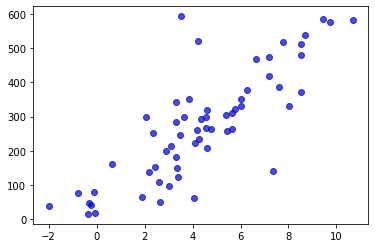

In [2]:
np.random.seed(2)
n_samples = 60
outliers_ratio = 0.2
n_inputs = 1
n_outputs = 1
x = 10*np.random.random((n_samples,n_inputs) )
fit = np.random.normal(n_samples,n_inputs)
y = np.dot(x,fit)
x_noise = x + np.random.normal(size=x.shape)
y_noise = y + np.random.normal(size=y.shape)
n_outliers = int(outliers_ratio*n_samples)
indices = np.arange(x_noise.shape[0])

np.random.shuffle(indices)
outlier_indices = indices[0:n_outliers]

x_noise[outlier_indices] =10* np.random.random(size=(n_outliers,n_inputs))
y_noise[outlier_indices] = y_noise[outlier_indices] +  10*np.random.normal(size=(n_outliers,n_outputs))
plt.plot(x_noise,y_noise,marker='o', color='#0000cc', linestyle='None', alpha=0.7)

In [7]:
def calc_model(points):
    
    k = (points[0][1] - points[1][1])/(points[0][0]-points[1][0]+ sys.float_info.epsilon)
    b = points[1][1]-k*points[1][0]
    return k, b

In [8]:
def intercept_dist(x0,y0,k,b,points):
    x = (x0+k*y0-k*b)/(1+k**2)
    y = (k*x0 + (k**2)*y0 - (k**2)*b)/(1 + k**2) + b
    f = (points[1][0]-points[0][0])*(y-points[0][1])-(points[1][1]-points[0][1])*(x-points[0][0])+ sys.float_info.epsilon
    f1 = np.divide(f,abs(f))    
    dist = np.sqrt((x-x0)**2+(y-y0)**2)
    dist_sgn = dist*f1
    #print(type(dist_sgn))
    return dist_sgn

In [9]:
def ransac_plot(x,y,k,b,thresh,perfectx,perfecty):
    plt.figure("Ransac", figsize=(5., 5.))
    plt.plot(x,y,marker='o', color='#0000cc', linestyle='None', alpha=0.5)
    #print(k*x+b) 
    plt.plot(x, k*x+b,color='#00cc00', linewidth=2)
    bias = thresh/(np.arctan(1/(k+sys.float_info.epsilon)))
    #print(bias)
    plt.plot(x, k*x+(b-bias),color='#ffff00', linewidth=0.5)
    plt.plot(x, k*x+(b+bias),color='#ffff00', linewidth=0.5)
    plt.plot(perfectx, perfecty,color='#ff00ff', linewidth=2)
    
    plt.show()

[[  8.50264999 479.62652139]
 [  5.63832825 262.97007929]]
found better  14 75.63970189482262 -163.51138885155598 at  0  iteration
[[  4.25079275 234.41427193]
 [  7.20010121 474.49106644]]
[[  8.67806537 537.29383311]
 [  4.06178436  61.66563238]]
[[  3.32783809 342.29752468]
 [  4.61374537 320.53103298]]
[[  2.06618752 298.82981893]
 [  8.51672275 371.28254649]]
[[  7.34685303 141.32121925]
 [  3.32255017 181.51562093]]
[[  5.38055558 303.29042133]
 [  6.00502102 331.25136147]]
[[  6.63245858 468.83352031]
 [  9.42962364 586.19113897]]
[[  4.25079275 234.41427193]
 [  5.78913429 322.42960823]]
[[  3.32783809 342.29752468]
 [  3.09437058 214.69200051]]
[[  2.42337504 152.49161053]
 [  5.43698112 257.12554682]]
[[-3.02284177e-01  4.79492899e+01]
 [ 6.00424977e+00  3.50288557e+02]]
found better  22 47.94063893141272 62.440986431266595 at  11  iteration
[[  8.50264999 479.62652139]
 [  4.56085189 297.62380194]]
[[ -0.76186683  76.97372101]
 [  2.34506563 252.569787  ]]
[[  9.73551311 577

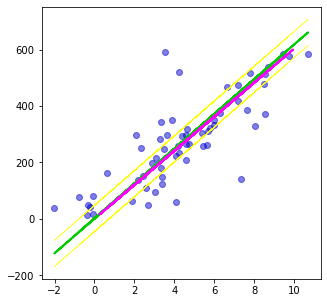

In [10]:
np.random.seed(2)
data = np.hstack( (x_noise,y_noise) )
k_iterations =70
n_inliners = 2
t_thresh =0.75
d_close_pts = int(x_noise.shape[0]*0.01)
iterations = 0
model_k = 0
model_b = 0
k = 0
b = 0
for iteration in range(k_iterations):
    #print('iteration',i)
    add_inliers_l = list()
    add_inliers_r = list()
    add_inliers = list()
    all_indices = np.arange(x_noise.shape[0])
    np.random.shuffle(all_indices)
    indices_1 = all_indices[:n_inliners]
    indices_2 = all_indices[n_inliners:]
    maybeInLiers = data[indices_1,:]
    otherPoints = data[indices_2,:]
    k, b = calc_model(maybeInLiers)
    dist = intercept_dist(otherPoints[:,0],otherPoints[:,1],k,b,maybeInLiers)
    for i in dist:
        if abs(i) < t_thresh:
            add_inliers.append(otherPoints[np.where(dist == i)[0][0]])
            if i<0:
                add_inliers_l.append(otherPoints[np.where(dist == i)[0][0]])
            elif i>0:
                add_inliers_r.append(otherPoints[np.where(dist == i)[0][0]])
    if len(add_inliers)>d_close_pts:
        if len(add_inliers_l)/len(add_inliers)>0.3 and len(add_inliers_l)/len(add_inliers)<0.7:
            d_close_pts = len(add_inliers)
            model_k = k
            model_b = b
            print('found better ', d_close_pts, model_k, model_b, 'at ',iteration, ' iteration')
    #ransac_plot(x_noise,y_noise,k,b,t_thresh)  
print( 'Best model: k = ',model_k,' b = ',model_b, 'close pts: ',d_close_pts)
ransac_plot(x_noise,y_noise,model_k,model_b,t_thresh,x,y) 
    